In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [11]:
# Extract & Transform
df = pd.read_csv('data/produkt_zehn_min_sd_20200101_20201231_05705.txt', delimiter = ";")

# Remove unneccesary columns
df.drop(['STATIONS_ID', '  QN', 'DS_10', 'SD_10', 'LS_10', 'eor'], axis = 1, inplace = True)

# / 1000 to convert from J/cm² to kJ/cm² then * 2.78 to convert to kWh/m², then * 50m^2 and * 6000 to convert to W/10 Min/m²) 
df['Watt_10min'] =  df['GS_10'] / 1000 * 2.78 * 50 * 6000 * 0.2

df['Watt_1h_ahead'] = df['Watt_10min'].rolling(6).mean().shift(-6).fillna(0)

df['Watt_4h_ahead'] = df['Watt_10min'].rolling(24).mean().shift(-24).fillna(0)

df['Watt_12h_ahead'] = df['Watt_10min'].rolling(72).mean().shift(-72).fillna(0)

df['Watt_24h_ahead'] = df['Watt_10min'].rolling(144).mean().shift(-144).fillna(0)

df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M')

#df.set_index('MESS_DATUM', inplace=True)

#cols = ['Watt_10min', 'Watt_1h_ahead','Watt_4h_ahead', 'Watt_12h_ahead', 'Watt_24h_ahead']
#df[cols] = df[cols].apply(lambda x: pd.Series.round(x, 1))
#df['data_string'] = df.apply(lambda x :';'.join(x.astype(str)),1)

df.head(60)


,MESS_DATUM,GS_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead
0,2020-01-01 00:00:00,0.0,0.00,0.00,0.000,321.553333,263.173333
1,2020-01-01 00:10:00,0.0,0.00,0.00,0.000,340.781667,263.173333
2,2020-01-01 00:20:00,0.0,0.00,0.00,0.000,356.766667,263.173333
3,2020-01-01 00:30:00,0.0,0.00,0.00,0.000,374.373333,263.173333
4,2020-01-01 00:40:00,0.0,0.00,0.00,0.000,391.285000,263.173333
5,2020-01-01 00:50:00,0.0,0.00,0.00,0.000,409.123333,263.173333
6,2020-01-01 01:00:00,0.0,0.00,0.00,0.000,425.108333,263.173333
7,2020-01-01 01:10:00,0.0,0.00,0.00,0.000,439.008333,263.173333
8,2020-01-01 01:20:00,0.0,0.00,0.00,0.000,452.445000,263.173333
9,2020-01-01 01:30:00,0.0,0.00,0.00,0.000,463.796667,263.173333


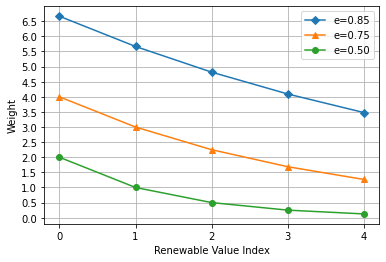

[2.0, 1.0, 0.5, 0.25, 0.125]
[4.0, 3.0, 2.25, 1.6875, 1.265625]
[6.666666666666666, 5.666666666666666, 4.8166666666666655, 4.094166666666665, 3.4800416666666654]


In [4]:
# Wertebereich für x-Achse festlegen:
x = [0, 1.0, 2.0, 3.0, 4.0]

x2 = [(0.5**num)/(1-0.5) for num in x]
x3 = [(0.75**num)/(1-0.75) for num in x]
x4 = [(0.85**num)/(1-0.85) for num in x]
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(x), max(x)+4, 0.5))

# Einzelne Diagramm-Linien plotten:
plt.plot(x, x4, 'D-', label="e=0.85")
plt.plot(x, x3,'^-', label="e=0.75")
plt.plot(x, x2,'o-', label="e=0.50")
plt.legend(loc="upper right")

# Diagramm-Gitter einblenden:
plt.grid(True)
plt.xlabel("Renewable Value Index")
plt.ylabel("Weight")
# Diagramm ausgeben:
plt.show()

print([(0.5**num)/(1-0.5) for num in x])
print([(0.75**num)/(1-0.75) for num in x])
print([(0.85**num)/(1-0.85) for num in x])

In [6]:
# Filter
start_date = '2020-06-01 11:30:00'
end_date = '2020-06-02 14:00:00'

mask = (df['MESS_DATUM'] >= start_date) & (df['MESS_DATUM'] < end_date)

selected_dates = df.loc[mask]

#selected_dates.set_index('MESS_DATUM')

selected_dates.head(20)




,MESS_DATUM,GS_10,Watt_10min,Watt_1h_ahead,Watt_4h_ahead,Watt_12h_ahead,Watt_24h_ahead
21957,2020-06-01 11:30:00,56.0,9340.80,54843.84,188634.12,241626.48,505387.32
21958,2020-06-01 11:40:00,55.6,9274.08,54460.20,184614.24,232352.40,505320.60
21959,2020-06-01 11:50:00,55.1,9190.68,54059.88,180394.20,223161.72,505303.92
21960,2020-06-01 12:00:00,54.9,9157.32,53576.16,175923.96,214004.40,505270.56
21961,2020-06-01 12:10:00,54.8,9140.64,52959.00,171170.16,204863.76,505237.20
21962,2020-06-01 12:20:00,54.4,9073.92,52241.76,166199.52,195789.84,505187.16
21963,2020-06-01 12:30:00,54.0,9007.20,51457.80,161045.40,186782.64,505087.08
21964,2020-06-01 12:40:00,53.3,8890.44,50640.48,155724.48,177892.20,505003.68
21965,2020-06-01 12:50:00,52.7,8790.36,49723.08,150220.08,169101.84,504970.32
21966,2020-06-01 13:00:00,52.0,8673.60,48705.60,144548.88,160428.24,504870.24
